In [4]:
# Importing Necessary Packages
import warnings
warnings.filterwarnings("ignore")

# import time
from datetime import date, timedelta, datetime
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import datetime
from pandas import Series,DataFrame
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# data visualization
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import ticker

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
# Setting Logging

In [6]:
import logging
import logging.handlers
import os

# create logger
logger = logging.getLogger('simple_example')
logger.setLevel(logging.DEBUG)

# create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)

# 'application' code
logger.debug('debug message')
logger.info('info message')
logger.warning('warn message')
logger.error('error message')
logger.critical('critical message')

2023-09-03 21:58:59,441 - simple_example - DEBUG - debug message
DEBUG:simple_example:debug message
2023-09-03 21:58:59,447 - simple_example - INFO - info message
INFO:simple_example:info message
2023-09-03 21:58:59,451 - simple_example - WARNING - warn message
2023-09-03 21:58:59,454 - simple_example - ERROR - error message
ERROR:simple_example:error message
2023-09-03 21:58:59,456 - simple_example - CRITICAL - critical message
CRITICAL:simple_example:critical message


In [7]:
# Class to load the data
class FetchData():
    def __init__(self):
        self.dfdict = {}
        self.dfdict['train'] = self.get_train_data()
        self.dfdict['test'] = self.get_test_data()
        self.dfdict['store'] = self.get_store_data()

    def get_train_data(self,name='train'):
        filename = f'../data/{name}.csv'
        try:
            df = pd.read_csv(filename)
            logging.info(f"{name} Dataset read successfully")
            return df

        except Exception as e:
            logging.exception(f" Exception occured in reading dataset, {e}")
            return None

    def get_test_data(self,name='test'):
        filename = f'../data/{name}.csv'
        try:
            df = pd.read_csv(filename)
            logging.info(f"{name} Dataset read successfully")
            return df

        except Exception as e:
            logging.exception(f" Exception occured in reading dataset, {e}")
            return None

    def get_store_data(self,name='store'):
        filename = f'../data/{name}.csv'
        try:
            df = pd.read_csv(filename)
            logging.info(f"{name} Dataset read successfully")
            return df

        except Exception as e:
            logging.exception(f" Exception occured in reading dataset, {e}")
            return None

In [8]:
data = FetchData()

ERROR:root: Exception occured in reading dataset, [Errno 2] No such file or directory: '../data/train.csv'
Traceback (most recent call last):
  File "<ipython-input-7-889e70740c3d>", line 12, in get_train_data
    df = pd.read_csv(filename)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 605, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1442, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/usr/local/lib/python3.10/dist-packa

In [9]:
train_data = pd.read_csv("/content/drive/MyDrive/Deep learning/train.csv")
train_store_data = pd.read_csv("/content/drive/MyDrive/Deep learning/train_store_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Deep learning/test.csv")

In [10]:
# temp_train_store_data.sample(4)
rossmann_store_sales = pd.DataFrame()
rossmann_store_sales['Date'] = train_data['Date']
rossmann_store_sales['Sales'] = train_data['Sales']
rossmann_store_sales.sample(5)

,Date,Sales
967711,2013-02-14,6682
402158,2014-07-07,5326
707209,2013-10-06,0
793438,2013-07-20,5003
965481,2013-02-16,7019


In [11]:
scaler = StandardScaler()
try:

    scale = scaler.fit(rossmann_store_sales[['Sales']])
    # transform the training data column
    rossmann_store_sales['Scaled_sales'] = scale.transform(rossmann_store_sales[['Sales']])
    logging.info(f"Changing non-numeric to numeric values, successfully")

except Exception as e:
    print(e)
    logging.exception(f"Exception occured while changing non-numeric to numeric values, Exception:{e}")

In [12]:
rossmann_store_sales.sample(4)

,Date,Sales,Scaled_sales
506696,2014-04-03,9889,1.068899
774303,2013-08-06,4425,-0.350349
910108,2013-04-07,0,-1.499723
295649,2014-10-29,6426,0.169401


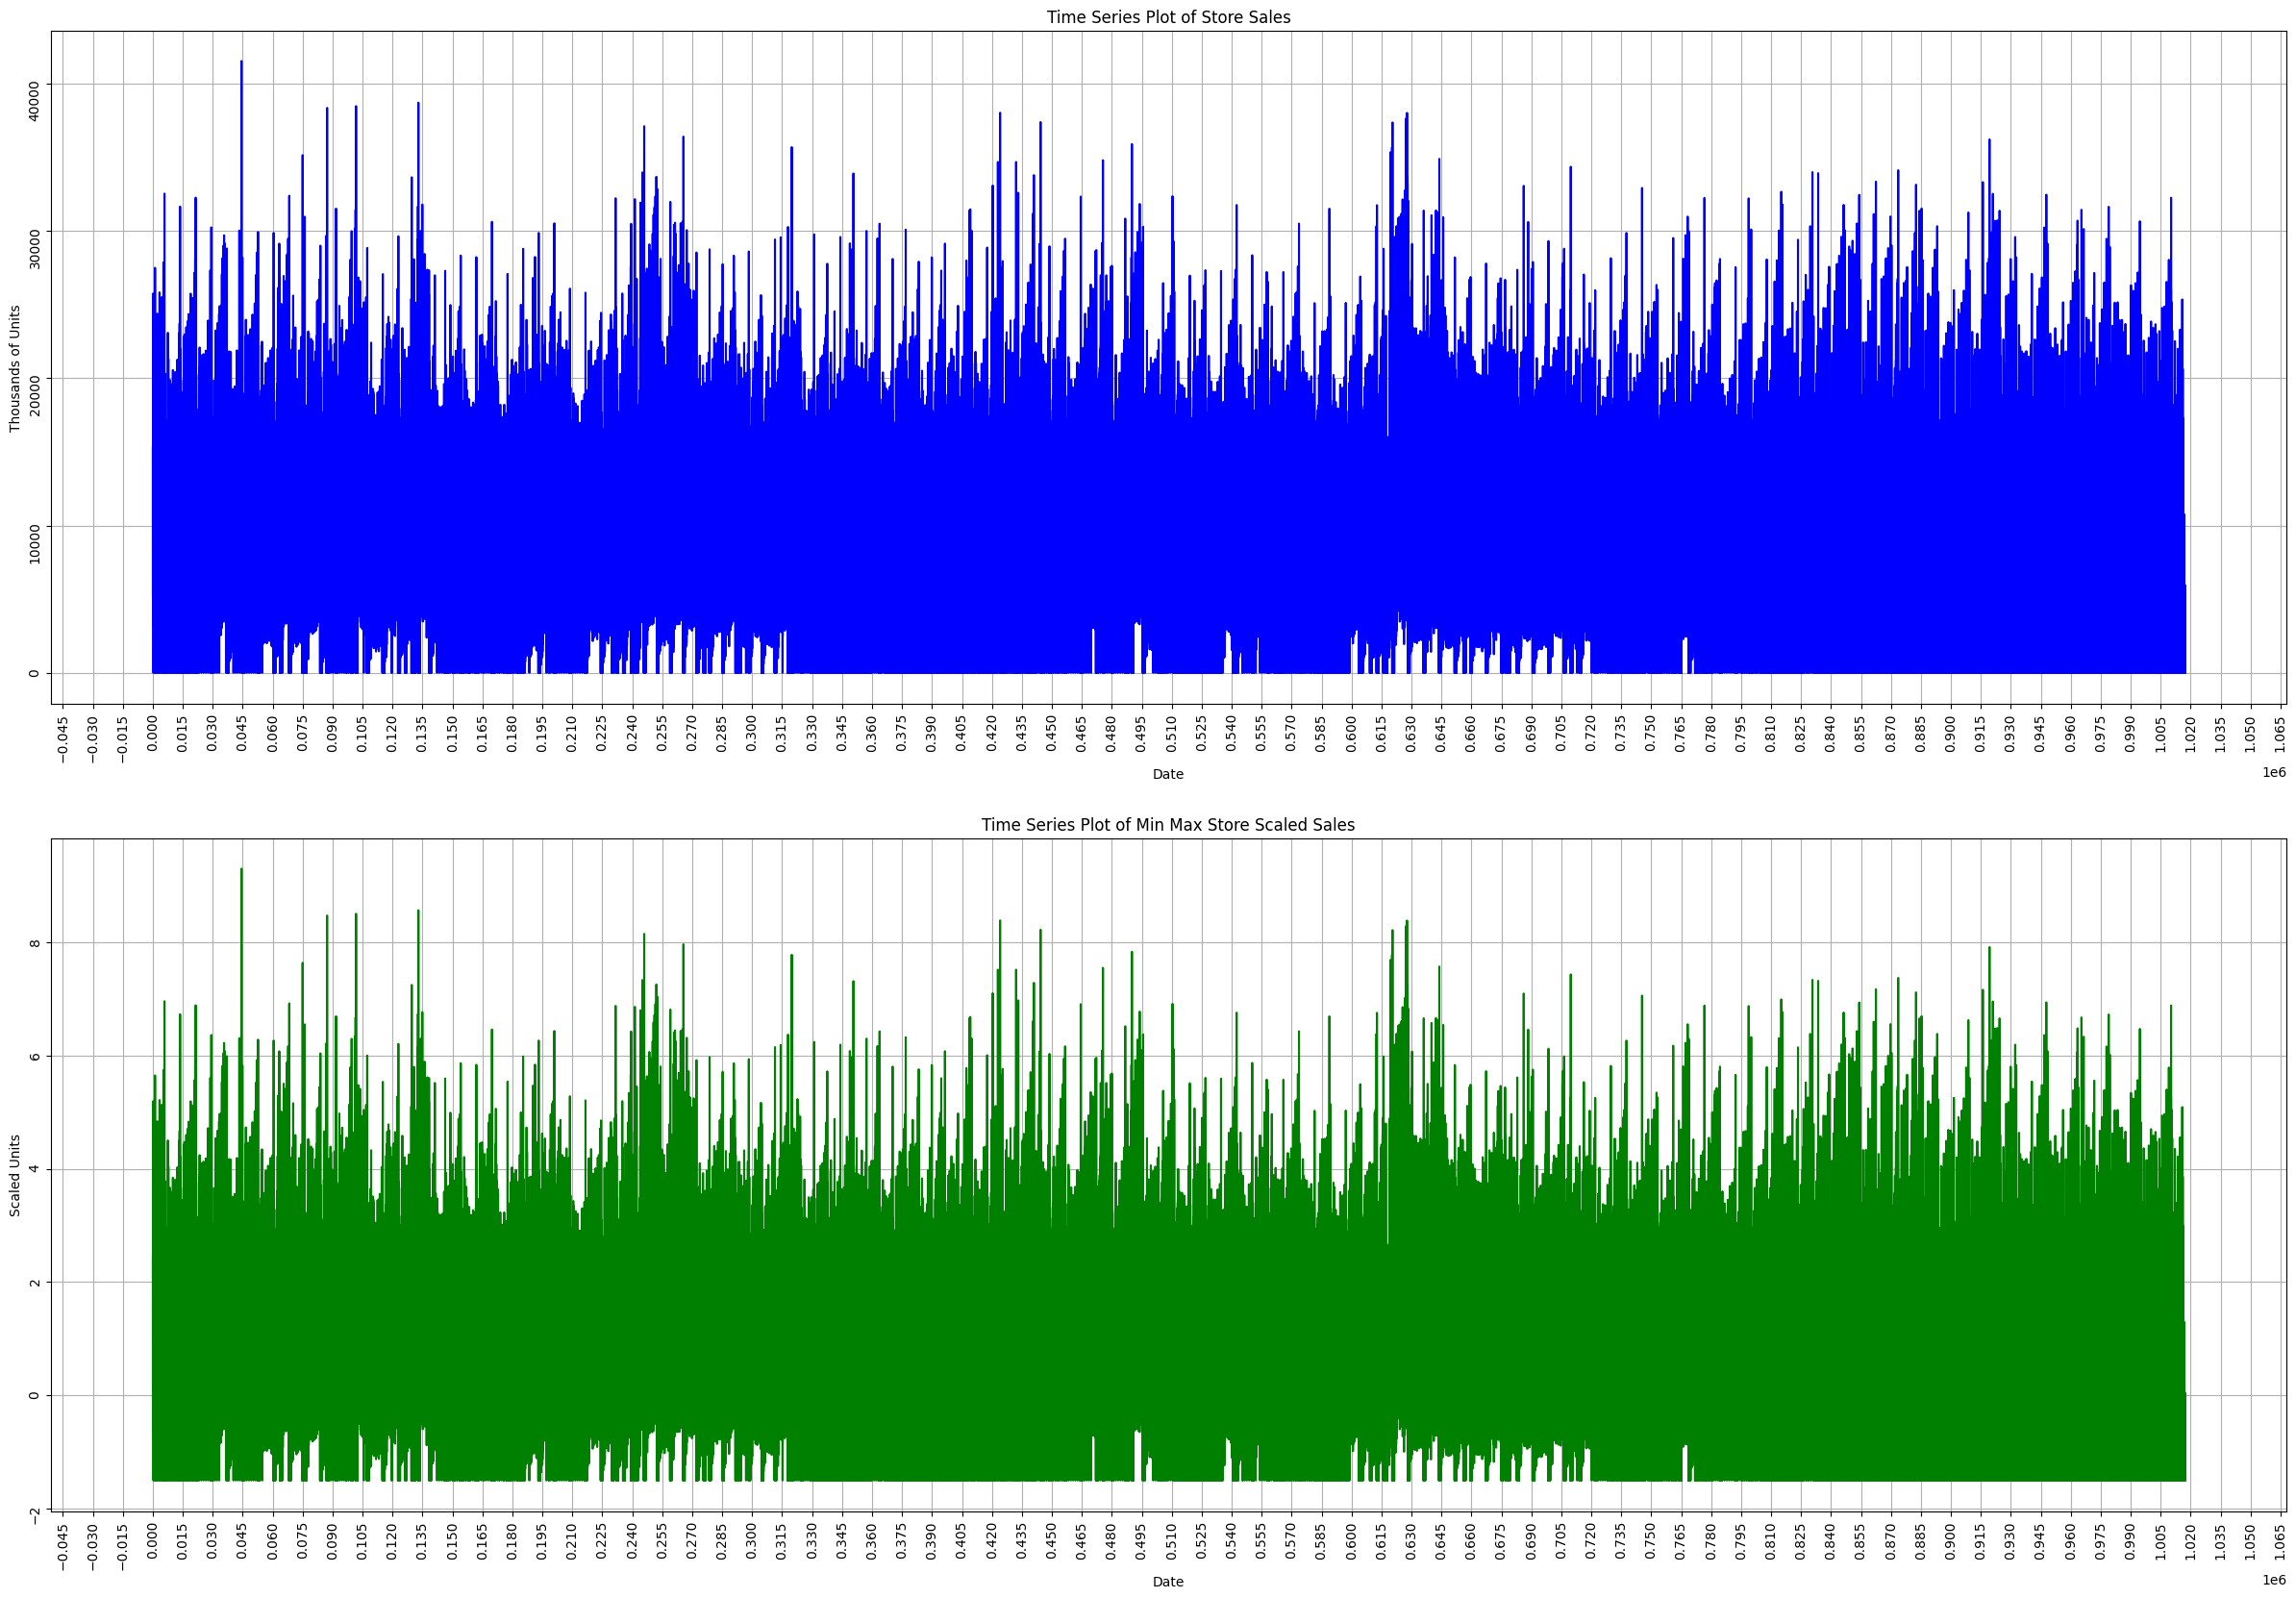

In [13]:
fig = plt.figure()
gs = GridSpec(2, 1, figure=fig)

fig.set_figheight(20)
fig.set_figwidth(30)
fig.tight_layout(pad=15)

M = 100
xticks = ticker.MaxNLocator(M)

ax1 = fig.add_subplot(gs[0,0])
ax1.plot(rossmann_store_sales.index, rossmann_store_sales.Sales, 'b-')
ax1.xaxis.set_major_locator(xticks)
ax1.tick_params(labelrotation=90)
ax1.set_xlabel('Date')
ax1.set_ylabel('Thousands of Units')
ax1.title.set_text('Time Series Plot of Store Sales')
ax1.grid(True)

ax2 = fig.add_subplot(gs[1,0])
ax2.plot(rossmann_store_sales.index, rossmann_store_sales.Scaled_sales, 'g-')
ax2.xaxis.set_major_locator(xticks)
ax2.tick_params(labelrotation=90)
ax2.set_xlabel('Date')
ax2.set_ylabel('Scaled Units')
ax2.title.set_text('Time Series Plot of Min Max Store Scaled Sales')
ax2.grid(True)
plt.show()

### Checking for Stationality
Step 1: Check Stationarity Before going any further into our analysis, our series has to be made stationary.
Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation etc). if the mean of a tm increases over time, then it not stationary.
The mean across many time periods is only informative if the expected value is the same across time periods. If these population parameters can vary, what are we really estimating by taking an average across time?
Stationarity requires that the statistical properties must be the same across time, making the sample average a reasonable way to estimate them.
Methods to Check Stationarity
1 Plotting rolling statistics: plotting rolling mean and variance is a first good way to visually inspect our series. If the rolling statistics exhibit a clear trend (upwards or downwards) and show varying variance (increasing or decreasing amplitude), then you might conclude that the series is very likely not stationary.

In [14]:
pip install statsmodels

In [15]:
SIZE = len(rossmann_store_sales.Scaled_sales)
WINDOW_SIZE = 48
# BATCH_SIZE= int(SIZE*0.8)
BATCH_SIZE = SIZE-WINDOW_SIZE*2
EPOCHS = 200

In [16]:
DateTrain = rossmann_store_sales.index.values[0:BATCH_SIZE]
DateValid = rossmann_store_sales.index.values[BATCH_SIZE:]
XTrain = rossmann_store_sales.Scaled_sales.values[0:BATCH_SIZE].astype('float32')
XValid = rossmann_store_sales.Scaled_sales.values[BATCH_SIZE:].astype('float32')

# Obtain shapes for vectors of size (,1) for dates series

DateTrain = np.reshape(DateTrain, (-1, 1))
DateValid = np.reshape(DateValid, (-1, 1))

print("Shape of the training set date series: ", DateTrain.shape)
print("Shape of the validation set date series: ", DateValid.shape)
print()
print("Shape of the training set logarithm of sales series: ", XTrain.shape)
print("Shape of the validation set logarithm of sales series in a stateless LSTM: ", XValid.shape)

Shape of the training set date series:  (1017113, 1)
Shape of the validation set date series:  (96, 1)

Shape of the training set logarithm of sales series:  (1017113,)
Shape of the validation set logarithm of sales series in a stateless LSTM:  (96,)


# New Section

In [17]:
tf.random.set_seed(1234)
# add extra dimension
series = tf.expand_dims(XTrain, axis=-1)
series.shape

TensorShape([1017113, 1])

In [18]:
# create tensor from each individual element
dataset = tf.data.Dataset.from_tensor_slices(series)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(1,), dtype=tf.float32, name=None)>

In [19]:
# takes a window_size + 1 chunk from the slices
dataset = dataset.window(WINDOW_SIZE + 1, shift=1, drop_remainder=True)

In [20]:
# Example of Window
datasetEx = tf.data.Dataset.from_tensor_slices(tf.range(10))
datasetEx = datasetEx.window(5, shift=1, drop_remainder=True)
for window in datasetEx:
    print([elem.numpy() for elem in window])

[0, 1, 2, 3, 4]
[1, 2, 3, 4, 5]
[2, 3, 4, 5, 6]
[3, 4, 5, 6, 7]
[4, 5, 6, 7, 8]
[5, 6, 7, 8, 9]


In [21]:
dataset = dataset.flat_map(lambda window: window.batch(WINDOW_SIZE + 1))

In [22]:
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))

In [23]:
dataset = dataset.batch(BATCH_SIZE).prefetch(1)

In [24]:
def windowed_dataset(series, window_size=WINDOW_SIZE, batch_size=BATCH_SIZE):
  series = tf.expand_dims(series, axis=-1)
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [25]:
DatasetTrain = windowed_dataset(XTrain)
DatasetVal = windowed_dataset(XValid)

# Define and Estimate the LSTM.

In [26]:
model = Sequential()
model.add(LSTM(8, input_shape=[None, 1], return_sequences=True))
model.add(LSTM(4, input_shape=[None, 1]))
model.add(Dense(1))
model.compile(loss="huber_loss", optimizer='adam')

## The Huber loss is chosen because it is quite robust for non linear regression models and models with non normal errors.

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 8)           320       
                                                                 
 lstm_1 (LSTM)               (None, 4)                 208       
                                                                 
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(DatasetTrain, epochs=200, validation_data=DatasetVal, verbose=1)

Epoch 1/200


In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

## Forecast the LSTM on the Validation Set and Assess Accuracy.

In [ ]:
def model_forecast(model, series, window_size):
  ds = tf.data.Dataset.from_tensor_slices(series)
  ds = ds.window(window_size, shift=1, drop_remainder=True)
  ds = ds.flat_map(lambda w: w.batch(window_size))
  ds = ds.batch(SIZE).prefetch(1)
  forecast = model.predict(ds)
  return forecast

In [ ]:
Forecast = model_forecast(model, rossmann_store_sales.Scaled_sales.values[:, np.newaxis], WINDOW_SIZE)
Results = Forecast[BATCH_SIZE-WINDOW_SIZE:-1]
Results1 = scaler.inverse_transform(Results.reshape(-1,1))
XValid1 = scaler.inverse_transform(XValid.reshape(-1,1))

In [ ]:

plt.figure(figsize=(30, 8))
plt.title("LSTM Model Forecast Compared to Validation Data")
plt.plot(DateValid.astype('datetime64'), Results1, label='Forecast series')
plt.plot(DateValid.astype('datetime64'), np.reshape(XValid1, (2*WINDOW_SIZE, 1)), label='Validation series')
plt.xlabel('Date')
plt.ylabel('Thousands of Units')
plt.xticks(DateValid.astype('datetime64')[:,-1], rotation = 90)
plt.legend(loc="upper right")

MAE = tf.keras.metrics.mean_absolute_error(XValid1[:,-1], Results[:,-1]).numpy()
RMSE = np.sqrt(tf.keras.metrics.mean_squared_error(XValid1[:,-1], Results[:,-1]).numpy())

textstr = "MAE = " + "{:.3f}".format(MAE) + "  RMSE = " + "{:.3f}".format(RMSE)

# place a text box in upper left in axes coords
plt.annotate(textstr, xy=(0.87, 0.05), xycoords='axes fraction')
plt.grid(True)

plt.show()